In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data Understanding and Exploration

In [3]:
#Reading the data
df = pd.read_json('Car-Attributes.json')

In [4]:
#Printing first 5 rows 
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [5]:
#Checking the shape of the dataset
df.shape

(398, 8)

In [6]:
#Checking the data types of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
 1   cyl     398 non-null    int64  
 2   disp    398 non-null    float64
 3   hp      398 non-null    object 
 4   wt      398 non-null    int64  
 5   acc     398 non-null    float64
 6   yr      398 non-null    int64  
 7   origin  398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


* We can see that hp column data type is object, but it should be continuos.
* Also origin datatype is integer, but it should be categprical.
* Datatypes of rest of the columns are as required. i.e there is no unexpected values in rest of the columns.

In [7]:
#Converting the data types
df['origin'] = df['origin'].astype('category')

* If we convert datatype of hp to float, then it gives error. So there might be some unusual data in that column.

In [8]:
#Checking 5 point summary of the data
df.describe()

,mpg,cyl,disp,wt,acc,yr
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000


# Data Cleaning and Analysis

In [9]:
#Checking the missing/unexpected values on hp column
x= pd.DataFrame(df.hp.str.isdigit())
df[x['hp']==False]

,mpg,cyl,disp,hp,wt,acc,yr,origin
32,25.0,4,98.0,?,2046,19.0,71,1
126,21.0,6,200.0,?,2875,17.0,74,1
330,40.9,4,85.0,?,1835,17.3,80,2
336,23.6,4,140.0,?,2905,14.3,80,1
354,34.5,4,100.0,?,2320,15.8,81,2
374,23.0,4,151.0,?,3035,20.5,82,1


There is 6 missing values in the hp column.

In [10]:
#Calculating the percentage of missing values on hp column
len(df[x['hp']==False])/len(df)*100

1.507537688442211

* We can see that, There are 1.507% values are missing/unexpected in the hp column
* We can replace the missing values ('?') with median.

In [11]:
#Replacing the missing/unexpected values with median
df['hp']=df['hp'].replace('?',df['hp'][df['hp']!='?'].median())

In [12]:
#Checking the missing values in other columns
df.isnull().sum()

mpg       0
cyl       0
disp      0
hp        0
wt        0
acc       0
yr        0
origin    0
dtype: int64

We can see that apart from hp column, there is no missing values in other columns.

In [13]:
#Checking the duplicate values in the dataset
df.duplicated().any()

False

There is no duplicate value in the dataset.

In [14]:
#Checking 5 point summary of the data
df.describe()

,mpg,cyl,disp,hp,wt,acc,yr
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


C:\Users\dell1\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


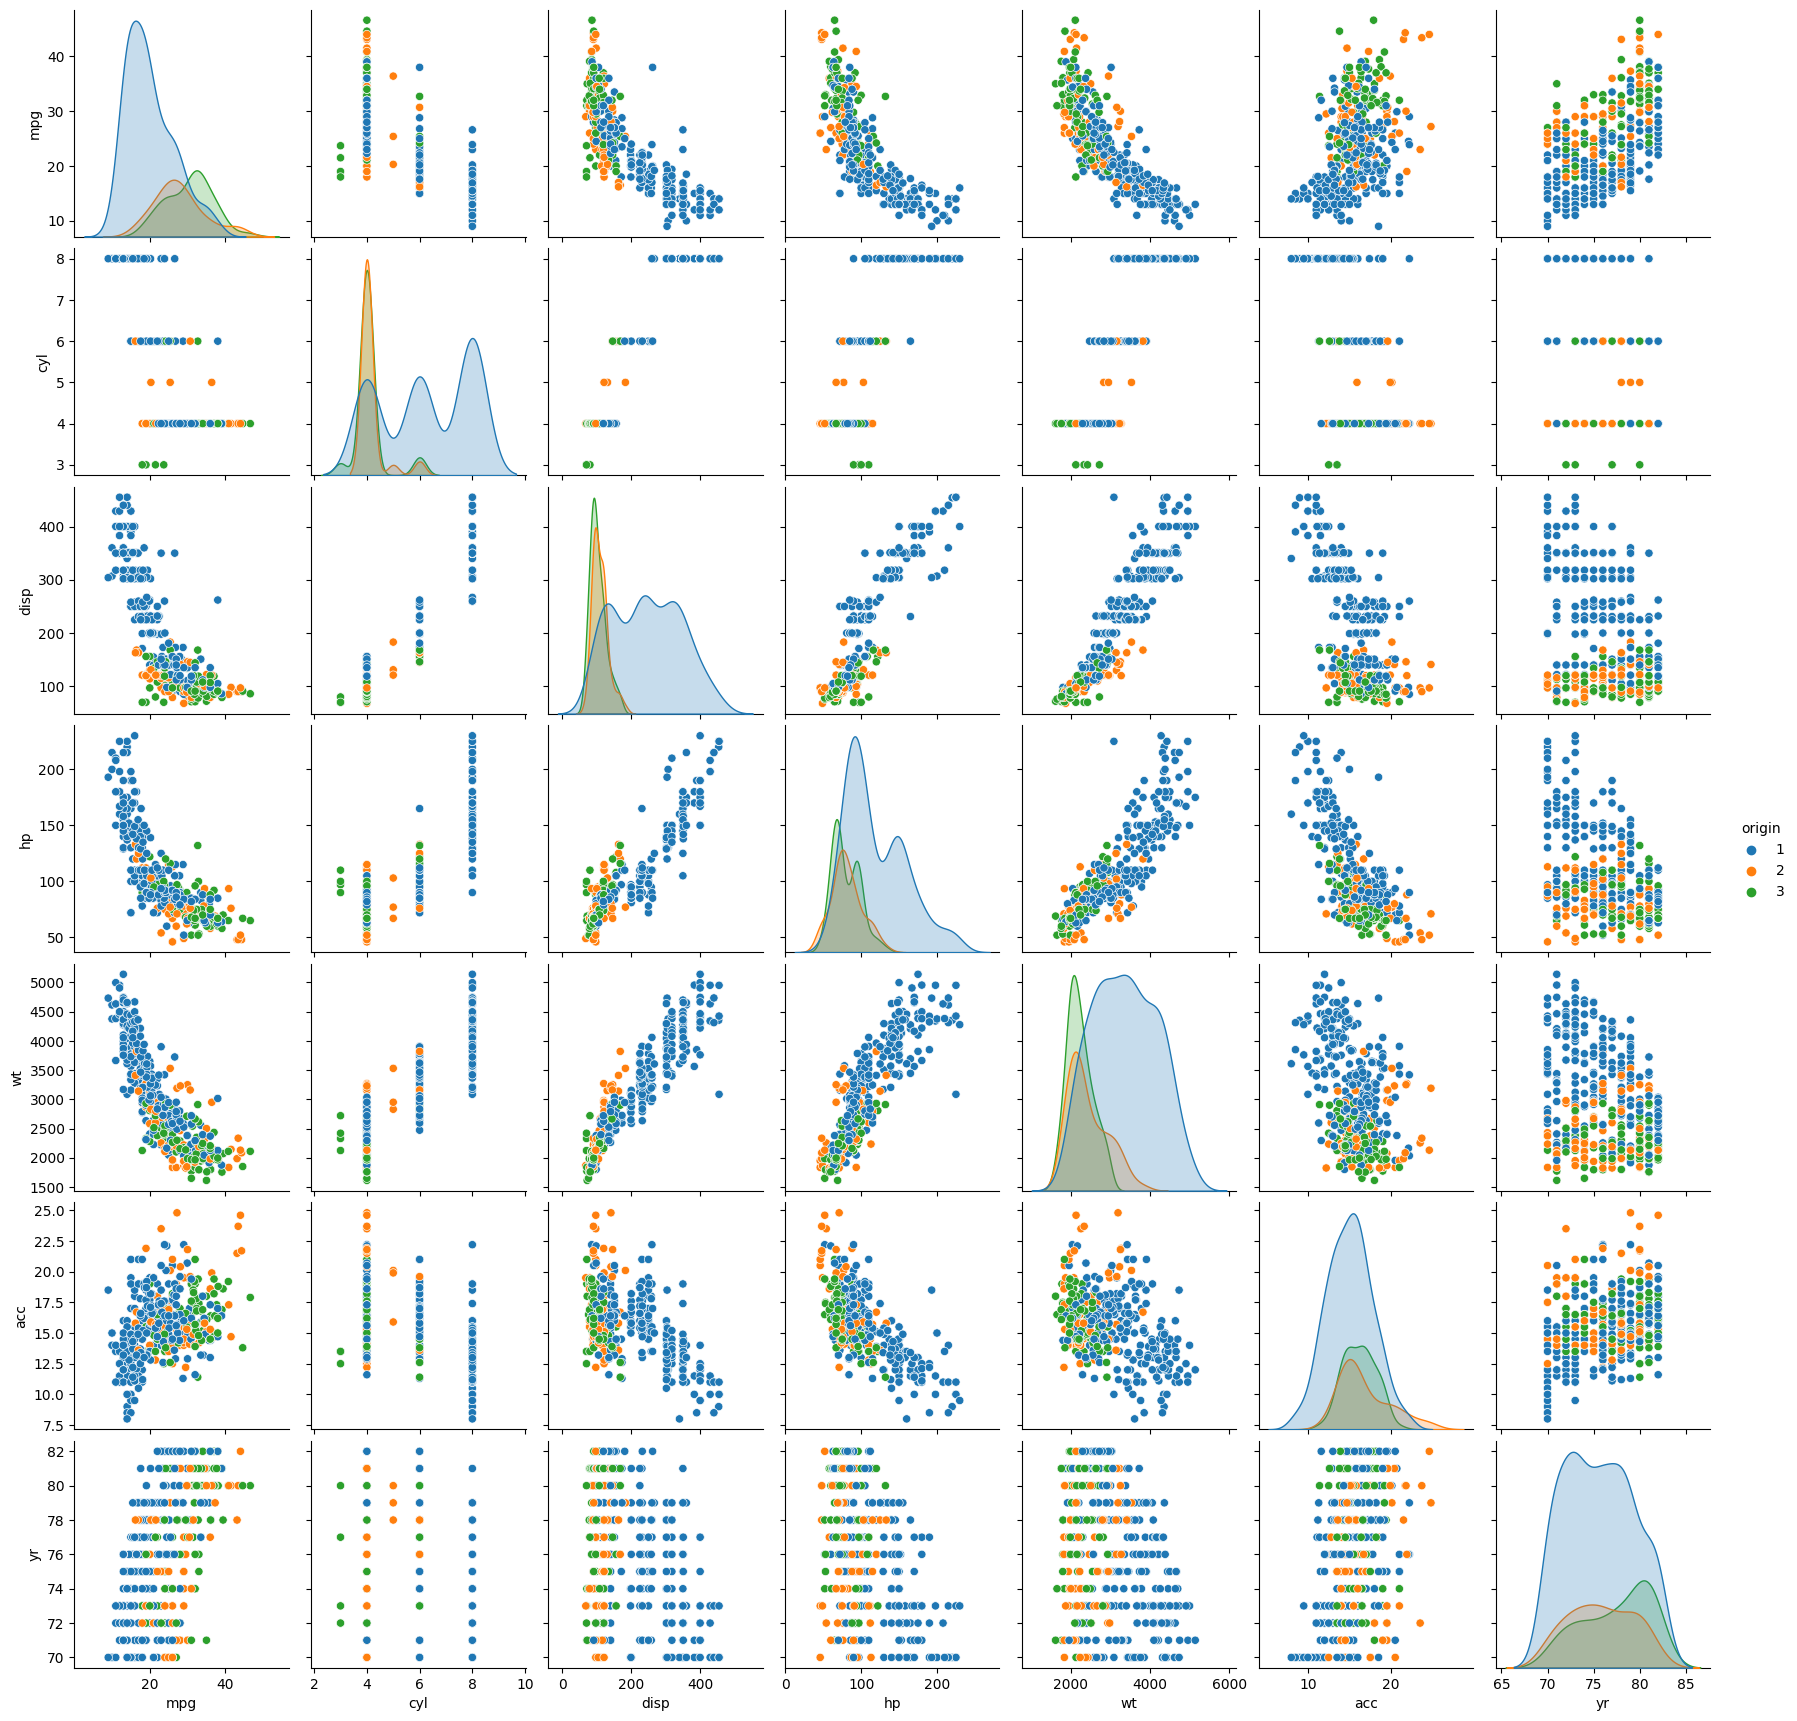

In [15]:
#Pairplot for all feature
sns.pairplot(df,diag_kind='kde',hue='origin')

* From the plot, we can see that there is a relationship between the some feature.

<Axes: xlabel='wt', ylabel='disp'>

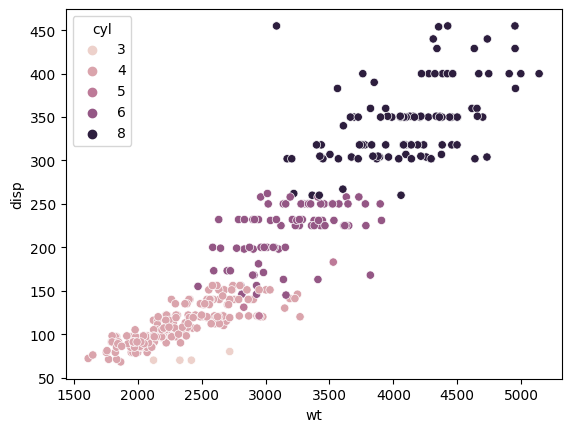

In [16]:
#Scatter plot between wt and disp distinguished by cyl
sns.scatterplot(x=df['wt'],y=df['disp'],hue=df['cyl'])

* We can see that, lower number of cylinders have low weight and displacement and high number cylinders have high weight and displacement. 
* Number of cylinders is directly related to weight an displacement.

<Axes: xlabel='wt', ylabel='mpg'>

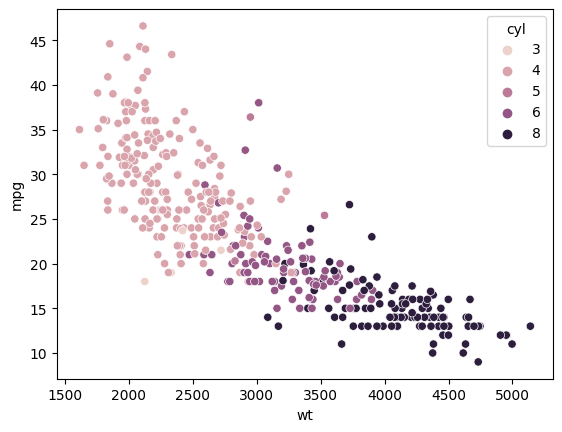

In [17]:
#Scatter plot between wt and mpg distinguished by cyl
sns.scatterplot(x=df['wt'],y=df['mpg'],hue=df['cyl'])

* We can see that, lower number of cylinders have low weight and high mpg, and high number cylinders have high weight and low mpg. 
* Number of cylinders is directly related to weight an inversely related to mpg.

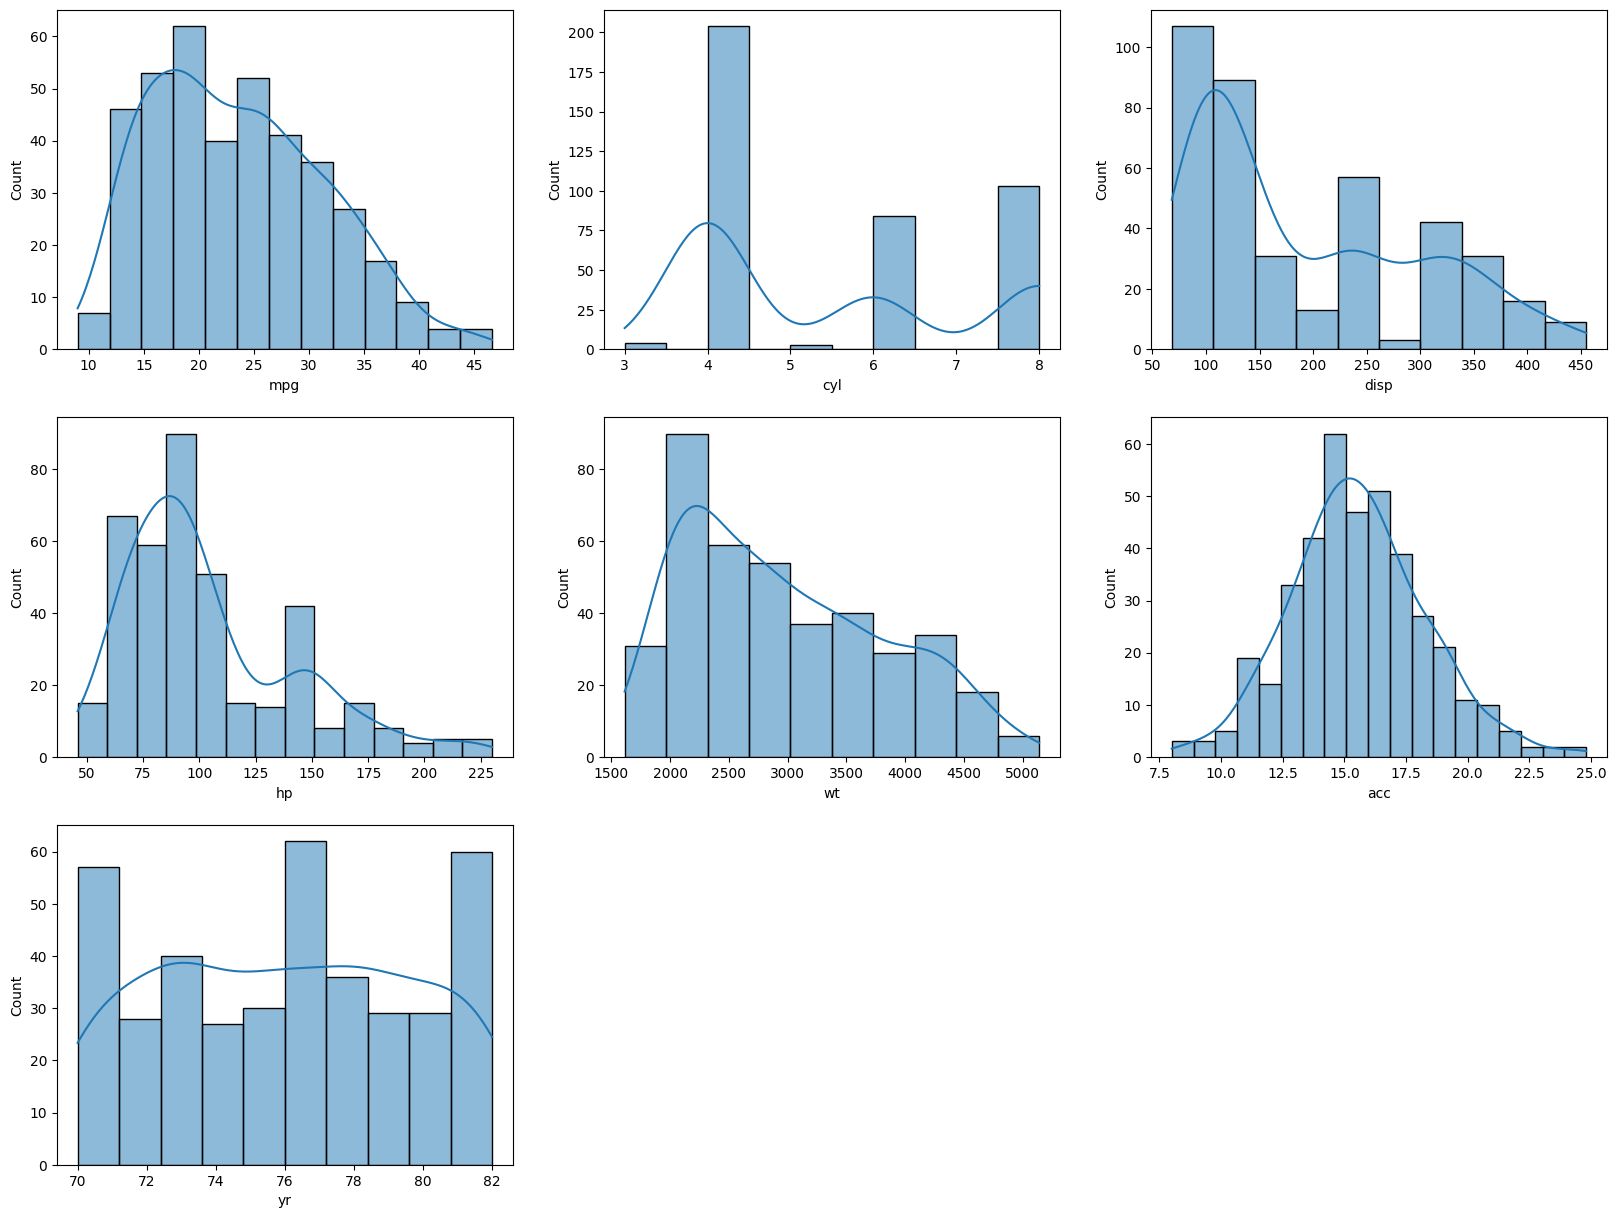

In [18]:
#Distribution plot for continuous variable
cols = df.select_dtypes(['int64','float64']).columns
ncol = 3
nrow = (len(cols)//ncol) + 1
plt.figure(figsize=(20,15))
for col, n in zip(cols, np.arange(len(cols))):
    ax = plt.subplot(nrow,ncol, n+1)
    sns.histplot(df[col], ax=ax, kde=True)

<Axes: >

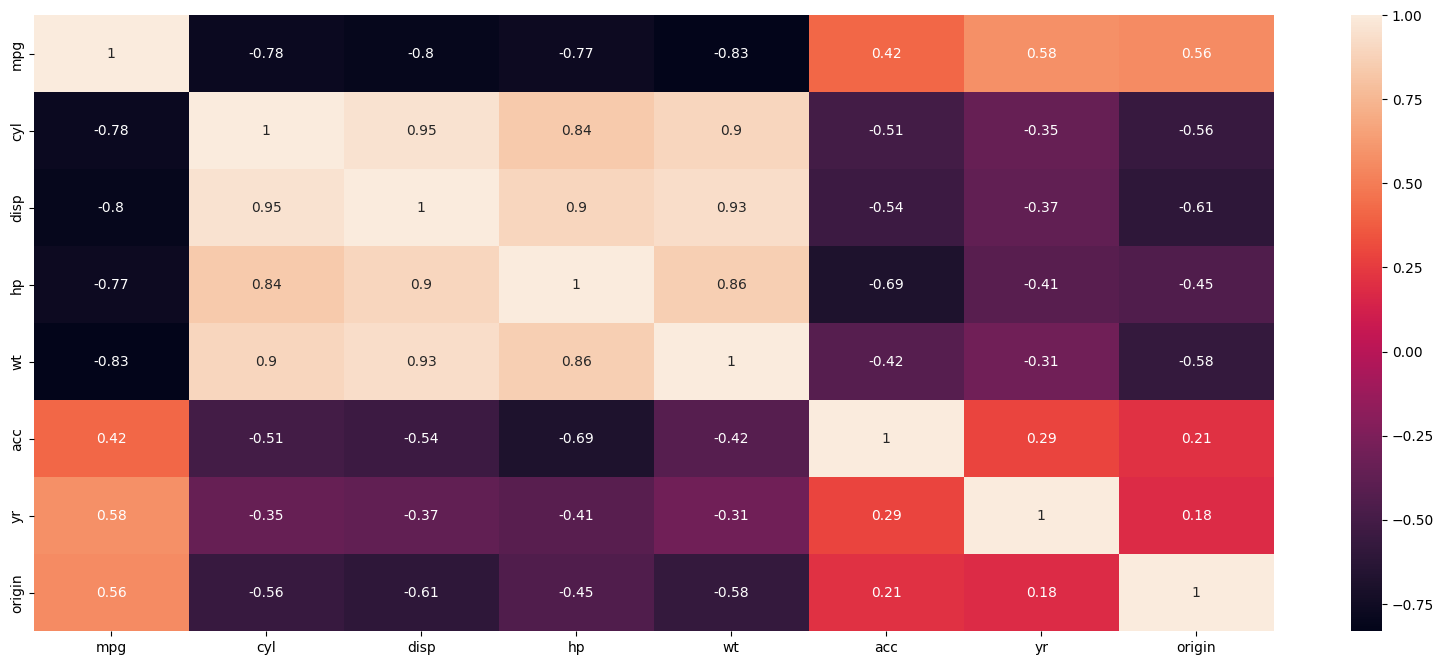

In [19]:
#Checking the correlation between the continuous variable
corr = df.corr()
plt.figure(figsize=(20,8))
sns.heatmap(corr, annot=True)

* mpg has a negative relationship with cyl, disp, hp and wt.
* cyl has a strong positive relationship with disp, hp, wt.
* disp has a strong positive relationship with hp, wt.
* hp has a strong positive relationship with wt.

([<matplotlib.patches.Wedge at 0x216d6dd6d60>,
 [Text(-0.42295633254055504, 1.015434853037773, '1'),
  Text(-0.17293561388226758, -1.0863209808574827, '2'),
  Text(0.9363126752779499, -0.5773374871891209, '3')],
 [Text(-0.23070345411303, 0.5538735562024215, ' 62.56%'),
  Text(-0.09432851666305503, -0.5925387168313542, ' 19.85%'),
  Text(0.5107160046970636, -0.3149113566486114, ' 17.59%')])

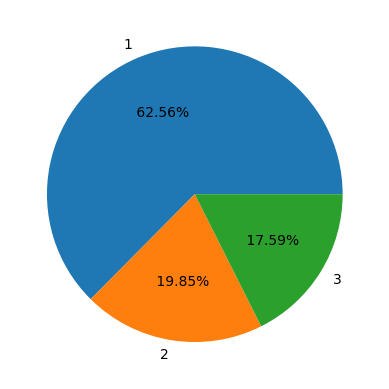

In [20]:
#Plotting pie plot for categorical variable
plt.pie(df['origin'].value_counts(),autopct='% 0.4g%%',labels=['1','2','3'])

<Axes: >

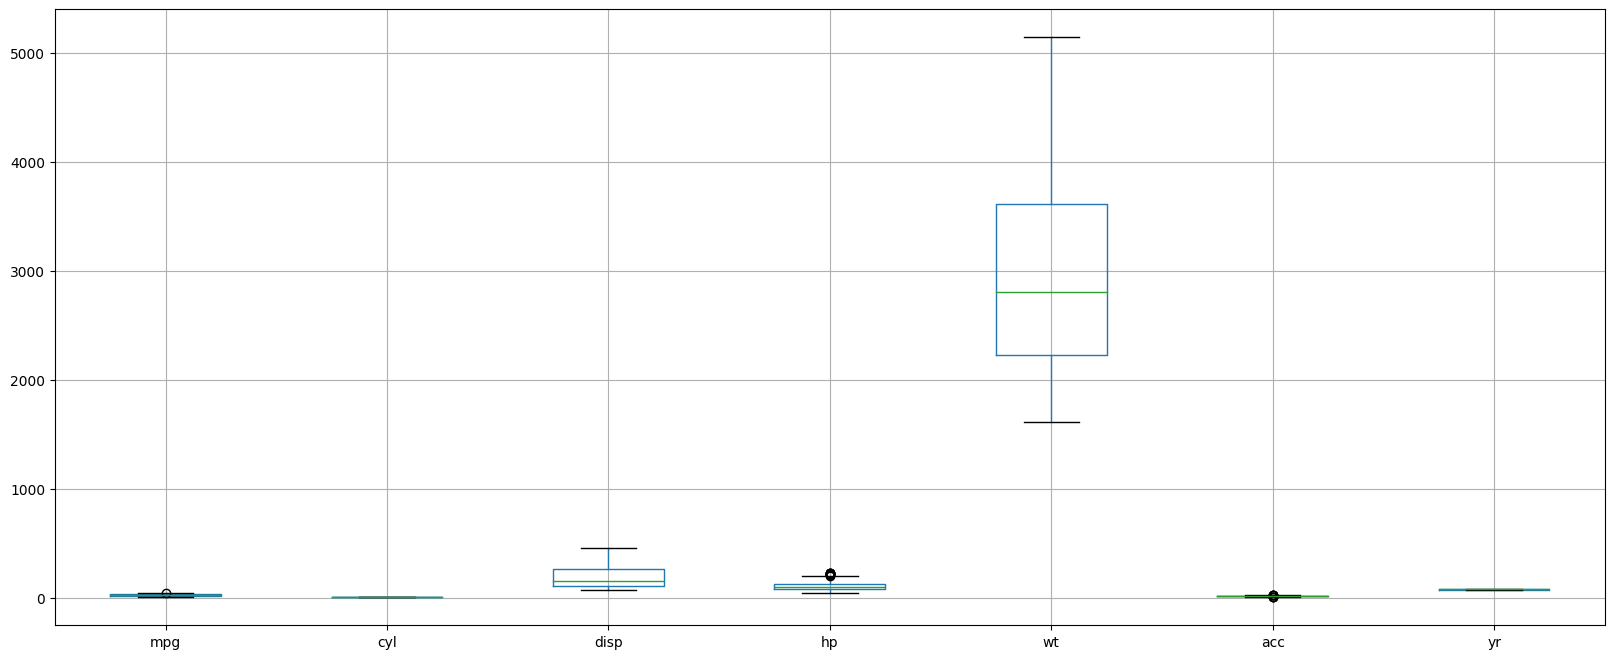

In [21]:
#Boxplot to detect outlier
plt.figure(figsize=(20,8))
df.boxplot()

* There are some outliers in the mpg, hp, acc column.
* We can replace the outlier with median value.

In [22]:
#Replacing outlier with median value
cols = ['mpg','hp','acc']
for col in cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    low = q1 - (1.5*iqr)
    up = q3 + (1.5*iqr)
    df_include = df[col][(df[col] > low) & (df[col] < up)]
    median = df_include.median()
    df[col] = np.where(df[col] < low, median, df[col])
    df[col] = np.where(df[col] > up, median, df[col])
    print("Number of outlier in",col,"after treatment is:",len(df[col][(df[col]< low) | (df[col] >up)]))

Number of outlier in mpg after treatment is: 0
Number of outlier in hp after treatment is: 0
Number of outlier in acc after treatment is: 0


# Data Preparation and Model Building

In [23]:
#One hot encoding for origin column
df = pd.get_dummies(df,columns=['origin'])

In [24]:
#Separating feature and target variable
x = df.drop('mpg',axis=1)
y = df['mpg']

In [25]:
#Splitting the data into training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8,random_state=1)

In [26]:
#scaling the data
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
x_train_scaled = scl.fit_transform(x_train)
x_test_scaled = scl.transform(x_test)

# Linear Regression

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
#Building and training the model
lr_model = LinearRegression()
lr_model.fit(x_train_scaled,y_train)

LinearRegression()

In [51]:
#Prediction for test set 
lr_model.predict(x_test_scaled)

array([21.55036408, 27.43174627, 19.8483807 , 26.68320214, 23.96237005,
       15.39348391, 29.42570973, 34.35446424, 17.33652285, 10.07314489,
       30.06008234, 16.94671361, 21.71055027, 27.13835232, 36.1965362 ,
       23.72648633,  9.1928832 , 20.32185988,  7.80684694, 32.59311311,
       25.53661653, 31.92320129, 20.63828764, 25.01182243, 25.20361439,
       29.33165749, 32.33220245, 32.36898253, 15.01979332, 29.79423224,
       27.02609714, 13.56049555, 21.10446389, 28.38997938, 24.72859324,
       12.66376751, 26.34542272, 12.23775561, 31.78425778, 23.74917341,
       23.86599229, 24.45880389, 20.90564531, 33.95546392, 26.01940143,
       22.03246837, 20.62918557, 11.23472711, 28.41909269, 18.8256894 ,
       24.19352349, 26.35827742, 16.60462528, 11.71655462, 28.24200847,
       24.53180919, 12.99612369, 12.51731745, 30.29135682, 35.6972416 ,
       35.97664955, 35.64644378, 17.82258071, 27.71482032, 19.64030046,
       33.2074896 , 26.77686665, 26.55674258, 29.47733919, 12.21

In [52]:
#Accuracy of training set
lr_model.score(x_train_scaled,y_train)

0.8164410317027418

In [53]:
#Accuracy of testing set
lr_model.score(x_test_scaled,y_test)

0.8661749877000561

# KNN

In [56]:
from sklearn.neighbors import KNeighborsRegressor

In [57]:
#Building and training the model
knn_model = KNeighborsRegressor()
knn_model.fit(x_train_scaled,y_train)

KNeighborsRegressor()

In [58]:
#Prediction for testing set
knn_model.predict(x_test_scaled)

array([21.  , 29.88, 16.58, 25.52, 19.86, 16.18, 29.  , 31.46, 15.8 ,
       12.8 , 27.32, 18.36, 20.72, 24.82, 35.08, 22.4 , 13.2 , 20.  ,
       12.8 , 37.82, 25.4 , 29.98, 20.6 , 24.6 , 27.08, 30.42, 32.82,
       37.36, 16.8 , 28.48, 20.82, 14.4 , 24.2 , 27.8 , 25.44, 13.2 ,
       26.5 , 12.8 , 31.9 , 22.4 , 24.4 , 25.44, 18.86, 33.66, 24.  ,
       20.12, 18.96, 13.4 , 27.9 , 19.2 , 24.6 , 27.28, 15.3 , 13.4 ,
       29.38, 23.8 , 12.8 , 13.8 , 30.8 , 35.38, 35.98, 35.68, 16.84,
       25.28, 17.38, 32.96, 26.12, 23.06, 27.68, 14.6 , 18.12, 25.2 ,
       14.2 , 28.5 , 14.6 , 26.7 , 29.88, 15.4 , 14.5 , 22.8 ])

In [59]:
#Accuracy for traing set
knn_model.score(x_train_scaled,y_train)

0.887885216859725

In [60]:
#Accuracy of testing set
knn_model.score(x_test_scaled,y_test)

0.886233631689819

# Random Forest

In [28]:
from sklearn.ensemble import RandomForestRegressor

In [62]:
#Building and Training the model
rf_model = RandomForestRegressor()
rf_model.fit(x_train_scaled,y_train)

RandomForestRegressor()

In [63]:
#Prediction for testing set
rf_model.predict(x_test_scaled)

array([20.739, 28.936, 16.871, 22.392, 20.429, 15.157, 28.857, 33.461,
       14.584, 13.045, 31.511, 16.72 , 19.626, 24.023, 36.216, 21.427,
       13.8  , 20.424, 11.96 , 38.028, 23.517, 30.488, 20.823, 26.837,
       26.958, 27.592, 32.949, 41.011, 17.137, 28.697, 25.063, 13.534,
       20.232, 23.934, 24.314, 14.195, 25.802, 12.37 , 32.889, 24.475,
       26.525, 23.908, 17.955, 34.489, 23.64 , 20.383, 18.474, 14.395,
       27.23 , 18.042, 26.827, 24.461, 15.13 , 13.298, 29.17 , 23.507,
       13.22 , 14.58 , 31.753, 34.758, 33.91 , 34.703, 14.647, 24.624,
       15.952, 34.434, 24.344, 23.816, 31.815, 14.44 , 16.237, 23.058,
       16.33 , 28.209, 14.6  , 27.278, 29.684, 15.24 , 15.295, 24.014])

In [64]:
#Accuracy of training set
rf_model.score(x_train_scaled,y_train)

0.979798505067713

In [65]:
#accuracy of testing set
rf_model.score(x_test_scaled, y_test)

0.8908903146594271

# gradient Boost

In [67]:
from sklearn.ensemble import GradientBoostingRegressor

In [68]:
#Building and training the model
gb_model = GradientBoostingRegressor()
gb_model.fit(x_train_scaled,y_train)

GradientBoostingRegressor()

In [69]:
#Prediction for testing set
gb_model.predict(x_test_scaled)

array([20.09976358, 27.36946358, 17.55161461, 21.65134052, 21.15112812,
       15.39398347, 28.1303689 , 34.16112656, 15.37139389, 12.94786555,
       30.61392553, 16.96334648, 18.28322368, 24.69228983, 37.82413335,
       21.12759528, 11.73775451, 19.10126611, 11.85277138, 37.56876108,
       23.4473434 , 30.67892791, 21.2321856 , 25.79055825, 26.15740636,
       27.4494754 , 32.6567257 , 39.41073633, 15.46254009, 27.91919211,
       25.3181061 , 14.40268246, 19.4977829 , 25.73157748, 23.86175588,
       14.01382634, 26.5471724 , 12.74064823, 36.29726118, 23.89737389,
       25.68576993, 23.86175588, 20.39459131, 34.51520626, 25.79757855,
       19.2061022 , 18.04660109, 14.01382634, 26.41621764, 18.33610843,
       25.79055825, 24.31988715, 15.48130849, 13.48499001, 30.89575318,
       23.42235598, 13.12684423, 14.08152172, 31.5237633 , 34.64548335,
       34.10860775, 34.59702642, 15.63539827, 26.01227611, 18.11278178,
       35.14743577, 28.33930074, 23.2694918 , 31.43603313, 13.93

In [70]:
#accuracy of training set 
gb_model.score(x_train_scaled,y_train)

0.9662906286763615

In [71]:
#Accuracy of testing set
gb_model.score(x_test_scaled,y_test)

0.9033585669602902

# Tunning for Gradient boost

In [72]:
#defining the parameters
parameter = {'n_estimators': [100, 150,200],'max_depth':np.arange(3,7,1),
                         'max_features':np.arange(0.2,0.6,0.1)
                        }

In [31]:
#Grid search to improve the performance
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
acc_score = metrics.make_scorer(metrics.accuracy_score)
grid = GridSearchCV(estimator=gb_model,param_grid=parameter)
grid.fit(x_train_scaled,y_train)

NameError: name 'gb_model' is not defined

In [78]:
grid.best_params_

{'max_depth': 4, 'max_features': 0.4000000000000001, 'n_estimators': 150}

In [79]:
gb_tunned = GradientBoostingRegressor(max_depth=4,max_features=0.4,n_estimators=150)

In [80]:
gb_tunned.fit(x_train_scaled,y_train)

GradientBoostingRegressor(max_depth=4, max_features=0.4, n_estimators=150)

In [81]:
gb_tunned.score(x_train_scaled,y_train)

0.9916510703237655

In [82]:
gb_tunned.score(x_test_scaled,y_test)

0.8910543800340205

# Tunning for Random Forest

In [29]:
#Defining the parameter for hyperparameter tuning
rf = RandomForestRegressor(random_state=1)
parameter = {'n_estimators': [150,200,250],
    'max_features':[0.2,0.3,0.4,0.5,0.6],
    'max_samples': [0.3,0.4,0.5,0.6]}

In [32]:
#Grid search to improve the performance
grid = GridSearchCV(estimator=rf,param_grid=parameter)
grid.fit(x_train_scaled,y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=1),
             param_grid={'max_features': [0.2, 0.3, 0.4, 0.5, 0.6],
                         'max_samples': [0.3, 0.4, 0.5, 0.6],
                         'n_estimators': [150, 200, 250]})

In [33]:
grid.best_params_

{'max_features': 0.5, 'max_samples': 0.6, 'n_estimators': 250}

In [34]:
rf_tunned = RandomForestRegressor(max_features=0.5,max_samples=0.6,n_estimators=250)

In [35]:
rf_tunned.fit(x_train_scaled,y_train)

RandomForestRegressor(max_features=0.5, max_samples=0.6, n_estimators=250)

In [36]:
rf_tunned.score(x_train_scaled,y_train)

0.9540829929405473

In [37]:
rf_tunned.score(x_test_scaled,y_test)

0.9082046202763915

# Comparing All the models

In [93]:
models =[lr_model,knn_model,rf_model,gb_model,rf_tunned,gb_tunned]
train_score = []
test_score = []
for model in models:
    train_score.append(model.score(x_train_scaled,y_train))
    test_score.append(model.score(x_test_scaled,y_test))

In [103]:
score = pd.DataFrame({'Models':["lr_model","knn_model","rf_model","gb_model","rf_tunned","gb_tunned"],
             "train_score":train_score,"Test_score":test_score})
score.sort_values(by='Test_score',ascending=False)

,Models,train_score,Test_score
4,rf_tunned,0.955538,0.909881
3,gb_model,0.966291,0.903359
5,gb_tunned,0.991651,0.891054
2,rf_model,0.979799,0.890890
1,knn_model,0.887885,0.886234
0,lr_model,0.816441,0.866175


* We can see that testing accuracy is highest for rf_tunned model, also traiing accuracy is 95% which is close to testing accuracy. So we can go ahead with model.

In [38]:
#Saving the model
import pickle
filename = 'trained_model.sav'
pickle.dump(rf_tunned,open(filename,'wb'))

In [39]:
#Loading the model
loaded_model = pickle.load(open('trained_model.sav','rb'))
loaded_model.predict(x_test_scaled)

array([20.922 , 27.1596, 17.3236, 22.1872, 20.0404, 15.116 , 30.6172,
       34.3868, 15.6668, 13.27  , 30.368 , 17.23  , 19.5944, 25.1324,
       35.9384, 21.6584, 13.468 , 20.0112, 12.002 , 36.7528, 23.6316,
       30.668 , 21.1876, 26.5132, 25.388 , 29.6168, 32.9828, 38.0984,
       16.7216, 28.1828, 25.208 , 13.7464, 21.0076, 24.388 , 24.6728,
       13.9436, 26.0908, 12.9264, 32.5252, 23.9776, 26.836 , 24.1932,
       18.2284, 33.8536, 24.1912, 20.0524, 18.1568, 14.2076, 27.4048,
       18.1196, 26.4572, 24.6532, 15.1308, 13.6232, 29.8372, 23.9884,
       13.1224, 14.332 , 31.5848, 35.9168, 34.5844, 35.746 , 15.6816,
       25.0396, 16.6304, 34.1644, 25.0576, 23.1076, 30.7608, 14.286 ,
       17.0104, 23.2456, 15.7188, 29.0744, 14.65  , 27.674 , 28.286 ,
       15.4052, 14.328 , 24.5188])

In [40]:
#Saving the scaled model
filename1= 'trained_model_scaled.sav'
pickle.dump(scl,open(filename1,'wb'))

In [41]:
#Loading the scaled model
loaded_model_scaled = pickle.load(open('trained_model_scaled.sav','rb'))
loaded_model_scaled.transform(x_test)

array([[ 3.46315058e-01, -1.97242753e-01, -9.15158342e-02,
         3.82584191e-02, -4.58562961e-01, -2.50534531e-01,
         7.88954358e-01, -4.67323020e-01, -5.06869802e-01],
       [-8.44259952e-01, -4.91211798e-01, -6.11741491e-01,
         3.32804193e-01,  1.88828872e+00,  1.38093265e+00,
        -1.26750044e+00,  2.13984751e+00, -5.06869802e-01],
       [ 1.53689007e+00,  1.24320557e+00,  1.22434906e+00,
         9.37461168e-01, -9.75665875e-01,  5.65199061e-01,
         7.88954358e-01, -4.67323020e-01, -5.06869802e-01],
       [-2.48972447e-01, -5.89201480e-01,  9.20932212e-02,
        -1.46132025e-01,  9.83170997e-02,  5.65199061e-01,
        -1.26750044e+00,  2.13984751e+00, -5.06869802e-01],
       [ 3.46315058e-01,  4.00494307e-01, -3.05726399e-01,
         3.74711112e-01,  1.01319149e+00,  8.37110259e-01,
         7.88954358e-01, -4.67323020e-01, -5.06869802e-01],
       [ 1.53689007e+00,  1.56657152e+00,  1.49976265e+00,
         1.65586549e+00, -4.58562961e-01,  2.932878

In [42]:
x_test

,cyl,disp,hp,wt,acc,yr,origin_1,origin_2,origin_3
174,6,171.0,97.0,2984,14.5,75,True,False,False
359,4,141.0,80.0,3230,20.4,81,False,True,False
250,8,318.0,140.0,3735,13.2,78,True,False,False
274,5,131.0,103.0,2830,15.9,78,False,True,False
283,6,232.0,90.0,3265,18.2,79,True,False,False
...,...,...,...,...,...,...,...,...,...
146,4,90.0,75.0,2125,14.5,74,True,False,False
327,5,121.0,67.0,2950,19.9,80,False,True,False
223,8,318.0,145.0,4140,13.7,77,True,False,False
159,8,351.0,148.0,4657,13.5,75,True,False,False


In [43]:
y_test

174    18.0
359    28.1
250    19.4
274    20.3
283    20.2
       ... 
146    28.0
327    36.4
223    15.5
159    14.0
23     26.0
Name: mpg, Length: 80, dtype: float64